In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from utils_knn import *

# BBC

In [2]:
mat_contents = sio.loadmat("./data/bbcsport-emd_tr_te_split.mat")

idx_train = mat_contents["TR"]-1
idx_test = mat_contents["TE"]-1
y = mat_contents["Y"][0]

X = mat_contents["X"][0]
w = mat_contents["BOW_X"][0]

dataset = "BBC"
path = "./results_BBC/"

### Results

#### OT

In [4]:
d_sw = np.loadtxt(path + "d_w_BBC_k0")
acc_w = np.mean(get_acc_knn(d_sw, y, idx_train, idx_test))

acc_w

0.9454545454545455

#### UOT

In [5]:
d_sw = np.loadtxt(path + "d_uw_BBC_rho1.0_k0")
acc_uw = np.mean(get_acc_knn(d_sw, y, idx_train, idx_test))

acc_uw

0.9672727272727274

#### Sinkhorn UOT

In [6]:
rhos_sinkhorn = [0.01, 0.05, 0.1, 1.0, 5.0, 10.0]
L_mean_sinkhorn = np.zeros((len(rhos_sinkhorn),))

for i, rho in enumerate(rhos_sinkhorn):
    d_sw = np.loadtxt(path + "d_sinkhorn_BBC_rho"+str(rho)+"_reg0.1_k0")
    L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
    L_mean_sinkhorn[i] = np.mean(L_acc)

print(L_mean_sinkhorn)

[0.29454545 0.47909091 0.65363636 0.95454545 0.94545455 0.94818182]


#### SOT

In [7]:
L_sw = np.zeros((3,))

for k in range(3):
    d_sw = np.loadtxt(path + "d_projs500_sw_BBC_k"+str(k))
    acc_sw = np.mean(get_acc_knn(d_sw, y, idx_train, idx_test))
    L_sw[k] = acc_sw
    
print(np.mean(L_sw), np.std(L_sw))

0.8939393939393939 0.007618063690894892


#### SUOT

In [8]:
rhos = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0]
L_mean_suw = np.zeros((len(rhos), 3))

for k in range(3):
    for i, rho in enumerate(rhos):
        d_sw = np.loadtxt(path + "d_projs500_suw_BBC_rho1"+str(rho)+"_rho2"+str(rho)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_suw[i, k] = np.mean(L_acc)
        
print(np.mean(L_mean_suw, axis=-1), np.std(L_mean_suw, axis=-1))

[0.22393939 0.25787879 0.22121212 0.89363636 0.90121212 0.89272727
 0.89242424] [0.01330576 0.00631293 0.00701566 0.00196386 0.00154516 0.00519589
 0.00366153]


#### USOT

In [9]:
rhos = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0]
L_mean_usw = np.zeros((len(rhos), 3))

for k in range(3):
    for i, rho in enumerate(rhos):
        d_sw = np.loadtxt(path + "d_projs500_usw_BBC_rho1"+str(rho)+"_rho2"+str(rho)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_usw[i, k] = np.mean(L_acc)
        
print(np.mean(L_mean_usw, axis=-1), np.std(L_mean_usw, axis=-1))

[0.76363636 0.92363636 0.91575758 0.89727273 0.8969697  0.88818182
 0.89060606] [0.00680301 0.00074227 0.00350783 0.00148454 0.00366153 0.00148454
 0.00482951]


In [10]:
rhos_usw = [0.0001, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 
            0.0002, 0.000205, 0.000208, 0.000209, 0.00021, 0.000211, 0.000212, 0.000215, 0.00022, 0.0003, 
            0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.1, 1.0]

In [11]:
L_mean_usw_v2 = np.zeros((len(rhos_usw), 3))

for k in range(3):
    for i, rho in enumerate(rhos_usw):
        d_sw = np.loadtxt(path + "d_projs500_usw_BBC_rho1"+str(rho)+"_rho2"+str(rho)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_usw_v2[i, k] = np.mean(L_acc)
        
print(np.mean(L_mean_usw_v2, axis=-1), np.std(L_mean_usw_v2, axis=-1))

[0.76363636 0.80212121 0.83575758 0.86969697 0.88848485 0.9030303
 0.91030303 0.91666667 0.91909091 0.92333333 0.93090909 0.91848485
 0.92393939 0.92575758 0.93515152 0.92848485 0.93151515 0.92787879
 0.92757576 0.92636364 0.92848485 0.92363636 0.91969697 0.9269697
 0.92272727 0.91363636 0.91575758 0.89727273 0.8969697  0.88818182
 0.89060606] [0.00680301 0.0059536  0.00422072 0.00380903 0.00281019 0.00834297
 0.00154516 0.00631293 0.00296908 0.0008571  0.00074227 0.00521353
 0.00422072 0.00622504 0.00042855 0.00299985 0.00422072 0.00154516
 0.00238606 0.00647096 0.00281019 0.00074227 0.00701566 0.00042855
 0.00267629 0.00589158 0.00350783 0.00148454 0.00366153 0.00148454
 0.00482951]


In [12]:
L_means = np.mean(L_mean_usw_v2, axis=-1)
L_std = np.std(L_mean_usw_v2, axis=-1)

for i, rho in enumerate(rhos_usw):
    print(rho, L_means[i], L_std[i])

0.0001 0.7636363636363636 0.00680301343049807
0.00011 0.8021212121212121 0.005953600819511703
0.00012 0.8357575757575759 0.0042207237203588195
0.00013 0.8696969696969697 0.0038090318454474534
0.00014 0.8884848484848483 0.0028101874228774882
0.00015 0.903030303030303 0.00834296963511286
0.00016 0.9103030303030303 0.001545157428361438
0.00017 0.9166666666666666 0.006312929289696898
0.00018 0.9190909090909091 0.002969078476100886
0.00019 0.9233333333333332 0.0008570991287109199
0.0002 0.9309090909090908 0.0007422696190251649
0.000205 0.9184848484848486 0.005213530464874357
0.000208 0.9239393939393938 0.004220723720358782
0.000209 0.9257575757575758 0.006225041995204182
0.00021 0.9351515151515151 0.00042854956435556463
0.000211 0.9284848484848486 0.002999846950488399
0.000212 0.9315151515151515 0.004220723720358732
0.000215 0.9278787878787879 0.0015451574283614816
0.00022 0.9275757575757577 0.0023860629921247786
0.0003 0.9263636363636364 0.006470956516382634
0.0004 0.9284848484848484 0.002

#### SUSOT

In [13]:
rhos = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0]
L_mean_susw = np.zeros((len(rhos), 3))

for i, rho in enumerate(rhos):
    for k in range(3):
        d_sw = np.loadtxt(path + "d_projs500_stochastic_usw_BBC_rho1"+str(rho)+"_rho2"+str(rho)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_susw[i, k] = np.mean(L_acc)
        
print(np.mean(L_mean_susw, axis=-1), np.std(L_mean_susw, axis=-1))

[0.76787879 0.92454545 0.91484848 0.89848485 0.89606061 0.88757576
 0.89272727] [0.00373601 0.00392772 0.00042855 0.00477213 0.00557114 0.00281019
 0.00128565]


In [14]:
rhos_susw = [0.0001, 0.0002, 0.00021, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0]

L_mean_susw = np.zeros((len(rhos_susw), 3))

for i, rho in enumerate(rhos_susw):
    for k in range(3):
        d_sw = np.loadtxt(path + "d_projs500_stochastic_usw_BBC_rho1"+str(rho)+"_rho2"+str(rho)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_susw[i, k] = np.mean(L_acc)
        
print(np.mean(L_mean_susw, axis=-1), np.std(L_mean_susw, axis=-1))

[0.76787879 0.92727273 0.92515152 0.92454545 0.91484848 0.89848485
 0.89606061 0.88757576 0.89272727] [0.00373601 0.00267629 0.00042855 0.00392772 0.00042855 0.00477213
 0.00557114 0.00281019 0.00128565]


### Figures

#### Ablation $\rho$

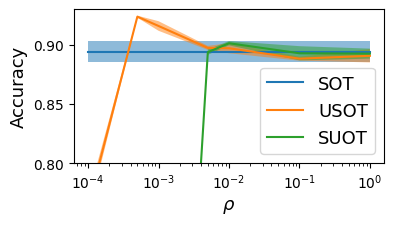

In [15]:
m_usw = np.mean(L_mean_usw, axis=1)
s_usw = np.std(L_mean_usw, axis=1)

m_suw = np.mean(L_mean_suw, axis=1)
s_suw = np.std(L_mean_suw, axis=1)

m_sw = np.mean(L_sw) * np.ones(len(rhos))
s_sw = np.std(L_sw) * np.ones(len(rhos))


fig, ax = plt.subplots(figsize=(4,2)) #, gridspec_kw={"width_ratios":[1,2]})

plt.plot(rhos, m_sw, label="SOT")
plt.fill_between(rhos, m_sw-2*s_sw/np.sqrt(3), m_sw+2*s_sw/np.sqrt(3), alpha=0.5)

plt.plot(rhos, m_usw, label="USOT")
plt.fill_between(rhos, m_usw-2*s_usw/np.sqrt(3), m_usw+2*s_usw/np.sqrt(3), alpha=0.5)

plt.plot(rhos, m_suw, label="SUOT")
plt.fill_between(rhos, m_suw-2*s_suw/np.sqrt(3), m_suw+2*s_suw/np.sqrt(3), alpha=0.5)

# plt.plot(rhos, acc_w * np.ones(len(rhos)), label="OT")
# plt.plot(rhos, L_mean_sinkhorn, label="Sinkhorn")
# plt.plot(rhos, L_mean_sinkhorn[-1] * np.ones(len(rhos)), label="Sinkhorn")


plt.xlabel(r"$\rho$", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.xscale("log")
plt.ylim(0.8, 0.93)
# plt.grid(True)
plt.legend(fontsize=13)
# plt.title("Accuracy - BBCSport", fontsize=13)

# plt.savefig("./Figures/ablation_rho_BBC_noW_v2.pdf", format="pdf", bbox_inches="tight")


plt.show()

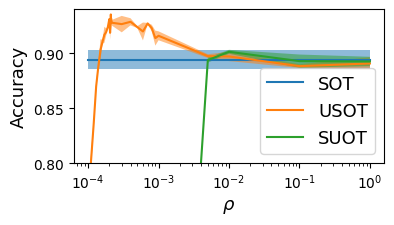

In [17]:
m_usw = np.mean(L_mean_usw_v2, axis=1)
s_usw = np.std(L_mean_usw_v2, axis=1)

m_suw = np.mean(L_mean_suw, axis=1)
s_suw = np.std(L_mean_suw, axis=1)

m_sw = np.mean(L_sw) * np.ones(len(rhos))
s_sw = np.std(L_sw) * np.ones(len(rhos))


fig, ax = plt.subplots(figsize=(4,2)) #, gridspec_kw={"width_ratios":[1,2]})

plt.plot(rhos, m_sw, label="SOT")
plt.fill_between(rhos, m_sw-2*s_sw/np.sqrt(3), m_sw+2*s_sw/np.sqrt(3), alpha=0.5)

plt.plot(rhos_usw, m_usw, label="USOT")
plt.fill_between(rhos_usw, m_usw-2*s_usw/np.sqrt(3), m_usw+2*s_usw/np.sqrt(3), alpha=0.5)

plt.plot(rhos, m_suw, label="SUOT")
plt.fill_between(rhos, m_suw-2*s_suw/np.sqrt(3), m_suw+2*s_suw/np.sqrt(3), alpha=0.5)

# plt.plot(rhos, acc_w * np.ones(len(rhos)), label="OT")
# plt.plot(rhos, L_mean_sinkhorn, label="Sinkhorn")
# plt.plot(rhos, L_mean_sinkhorn[-1] * np.ones(len(rhos)), label="Sinkhorn")


plt.xlabel(r"$\rho$", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.xscale("log")
plt.ylim(0.8, 0.94)
# plt.grid(True)
plt.legend(fontsize=13)
# plt.title("Accuracy - BBCSport", fontsize=13)

# plt.savefig("./Figures/ablation_rho_BBC_noW_v3.pdf", format="pdf", bbox_inches="tight")

# plt.grid(True)
plt.show()

#### Ablation FW

In [3]:
iters = [1,2,3,4,5,10,15,20,25,50,75,100]
rho = 0.0005
rho_suw = 0.01
    
L_mean_usw = np.zeros((len(iters), 3))
ts_usw = np.zeros((len(iters), 3))
    
L_mean_suw = np.zeros((len(iters), 3))
ts_suw = np.zeros((len(iters), 3))

for k in range(3):
    for i, n_iter in enumerate(iters):
        d_sw = np.loadtxt("./results_inner_iter/d_projs500_usw_BBC_rho1"+str(rho)+"_rho2"+str(rho)+"_iter"+str(n_iter)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_usw[i, k] = np.mean(L_acc)
        
        t_sw = np.loadtxt("./results_inner_iter/ts_projs500_usw_BBC_rho1"+str(rho)+"_rho2"+str(rho)+"_iter"+str(n_iter)+"_k"+str(k))
        ts_usw[i, k] = np.mean(t_sw)
        
        d_sw = np.loadtxt("./results_inner_iter/d_projs500_suw_BBC_rho1"+str(rho_suw)+"_rho2"+str(rho_suw)+"_iter"+str(n_iter)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_suw[i, k] = np.mean(L_acc)
        
        t_sw = np.loadtxt("./results_inner_iter/ts_projs500_suw_BBC_rho1"+str(rho_suw)+"_rho2"+str(rho_suw)+"_iter"+str(n_iter)+"_k"+str(k))
        ts_suw[i, k] = np.mean(t_sw)

In [4]:
d_sw = np.loadtxt(path + "d_w_BBC_k0")
acc_w = np.mean(get_acc_knn(d_sw, y, idx_train, idx_test))

acc_w

0.9163636363636364

In [5]:
L_sw = np.zeros((3,))

for k in range(3):
    d_sw = np.loadtxt(path + "d_projs500_sw_BBC_k"+str(k))
    acc_sw = np.mean(get_acc_knn(d_sw, y, idx_train, idx_test))
    L_sw[k] = acc_sw
    
print(np.mean(L_sw), np.std(L_sw))

0.8939393939393939 0.007618063690894892


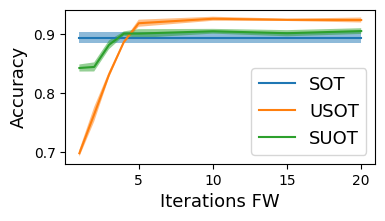

In [6]:
k = 8

m_usw = np.mean(L_mean_usw, axis=1)
s_usw = np.std(L_mean_usw, axis=1)

m_suw = np.mean(L_mean_suw, axis=1)
s_suw = np.std(L_mean_suw, axis=1)

m_sw = np.mean(L_sw) * np.ones(len(iters))
s_sw = np.std(L_sw) * np.ones(len(iters))


fig, ax = plt.subplots(figsize=(4,2)) #, gridspec_kw={"width_ratios":[1,2]})

plt.plot(iters[:k], m_sw[:k], label="SOT")
plt.fill_between(iters[:k], (m_sw-2*s_sw/np.sqrt(3))[:k], (m_sw+2*s_sw/np.sqrt(3))[:k], alpha=0.5)


plt.plot(iters[:k], m_usw[:k], label="USOT")
plt.fill_between(iters[:k], (m_usw-2*s_usw/np.sqrt(3))[:k], (m_usw+2*s_usw/np.sqrt(3))[:k], alpha=0.5)


plt.plot(iters[:k], m_suw[:k], label="SUOT")
plt.fill_between(iters[:k], (m_suw-2*s_suw/np.sqrt(3))[:k], (m_suw+2*s_suw/np.sqrt(3))[:k], alpha=0.5)

# plt.plot(iters, acc_w * np.ones(len(iters)), label="OT")
# plt.plot(rhos, L_mean_sinkhorn, label="Sinkhorn")
# plt.plot(rhos, L_mean_sinkhorn[-1] * np.ones(len(rhos)), label="Sinkhorn")


plt.xlabel("Iterations FW", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
# plt.xscale("log")
# plt.ylim(0.8, 0.93)
# plt.grid(True)
# plt.xticks(iters)
plt.legend(fontsize=13)
# plt.title("BBCSport", fontsize=13)
plt.savefig("./Figures/ablation_fw_BBC.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Ablation Projections

In [7]:
projs = np.logspace(0, 3, 10, dtype=int)
rho = 0.0005
rho_suw = 0.01
    
L_mean_usw = np.zeros((len(projs), 3))
L_mean_sw = np.zeros((len(projs), 3))
L_mean_suw = np.zeros((len(projs), 3))

for k in range(3):
    for i, n_projs in enumerate(projs):
        d_sw = np.loadtxt("./results_projs/d_projs"+str(n_projs)+"_usw_BBC_rho1"+str(rho)+"_rho2"+str(rho)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_usw[i, k] = np.mean(L_acc)
        
        
        d_sw = np.loadtxt("./results_projs/d_projs"+str(n_projs)+"_sw_BBC_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_sw[i, k] = np.mean(L_acc)
        
        d_sw = np.loadtxt("./results_projs/d_projs"+str(n_projs)+"_suw_BBC_rho1"+str(rho_suw)+"_rho2"+str(rho_suw)+"_k"+str(k))
        L_acc = get_acc_knn(d_sw, y, idx_train, idx_test)
        L_mean_suw[i, k] = np.mean(L_acc)

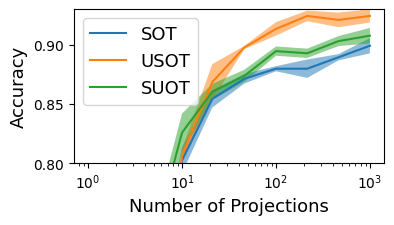

In [8]:
m_usw = np.mean(L_mean_usw, axis=1)
s_usw = np.std(L_mean_usw, axis=1)

m_suw = np.mean(L_mean_suw, axis=1)
s_suw = np.std(L_mean_suw, axis=1)

m_sw = np.mean(L_mean_sw, axis=1)
s_sw = np.std(L_mean_sw, axis=1)

fig, ax = plt.subplots(figsize=(4,2)) #, gridspec_kw={"width_ratios":[1,2]})

plt.plot(projs, m_sw, label="SOT")
plt.fill_between(projs, m_sw-2*s_sw/np.sqrt(3), m_sw+2*s_sw/np.sqrt(3), alpha=0.5)


plt.plot(projs, m_usw, label="USOT")
plt.fill_between(projs, m_usw-2*s_usw/np.sqrt(3), m_usw+2*s_usw/np.sqrt(3), alpha=0.5)


plt.plot(projs, m_suw, label="SUOT")
plt.fill_between(projs, m_suw-2*s_suw/np.sqrt(3), m_suw+2*s_suw/np.sqrt(3), alpha=0.5)

# plt.plot(projs, acc_w * np.ones(len(projs)), label="OT")
# plt.plot(rhos, L_mean_sinkhorn, label="Sinkhorn")
# plt.plot(rhos, L_mean_sinkhorn[-1] * np.ones(len(rhos)), label="Sinkhorn")


plt.xlabel("Number of Projections", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.xscale("log")
plt.ylim(0.8, 0.93)
# plt.grid(True)
plt.legend(fontsize=13)
# plt.title("BBCSport", fontsize=13)

plt.savefig("./Figures/ablation_projs_BBC.pdf", format="pdf", bbox_inches="tight")

plt.show()

### Cross Validation on $\rho$

#### USOT

In [3]:
rhos = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1.0]


L_mean_usw = []

for k in range(3):
    L_acc = get_acc_knn_cv_rho(dataset, "usw", k, rhos, y, idx_train, idx_test)
    print(k, L_acc)
    L_mean_usw.append(np.mean(L_acc))
    
print(np.mean(L_mean_usw, axis=-1), np.std(L_mean_usw, axis=-1))

0 [0.9090909090909091, 0.9409090909090909, 0.9090909090909091, 0.9181818181818182, 0.9272727272727272]
1 [0.9045454545454545, 0.9454545454545454, 0.9227272727272727, 0.9181818181818182, 0.9227272727272727]
2 [0.9136363636363637, 0.9545454545454546, 0.9318181818181818, 0.9181818181818182, 0.9]
0.9224242424242425 0.0011338355717495777


In [11]:
rhos = [0.0001, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 
        0.0002, 0.000205, 0.000208, 0.000209, 0.00021, 0.000211, 0.000212, 0.000215, 0.00022, 0.0003, 
        0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.1, 1.0]

L_mean_usw = []

for k in range(3):
    L_acc = get_acc_knn_cv_rho(dataset, "usw", k, rhos, y, idx_train, idx_test)
    print(k, L_acc)
    L_mean_usw.append(np.mean(L_acc))
    
print(np.mean(L_mean_usw, axis=-1), np.std(L_mean_usw, axis=-1))

0 [0.9, 0.9545454545454546, 0.9272727272727272, 0.9136363636363637, 0.9090909090909091]
1 [0.9136363636363637, 0.95, 0.9181818181818182, 0.9181818181818182, 0.9181818181818182]
2 [0.9363636363636364, 0.9545454545454546, 0.9227272727272727, 0.9272727272727272, 0.9272727272727272]
0.9260606060606061 0.005471354571293261


#### SUOT

In [4]:
rhos = [0.0001, 0.001, 0.01, 0.1, 1.0]

L_mean_usw = []

for k in range(3):
    L_acc = get_acc_knn_cv_rho(dataset, "suw", k, rhos, y, idx_train, idx_test)
    print(k, L_acc)
    L_mean_usw.append(np.mean(L_acc))
    
print(np.mean(L_mean_usw, axis=-1), np.std(L_mean_usw, axis=-1))

0 [0.9045454545454545, 0.9272727272727272, 0.8727272727272727, 0.8954545454545455, 0.8863636363636364]
1 [0.9363636363636364, 0.9227272727272727, 0.8818181818181818, 0.8772727272727273, 0.9227272727272727]
2 [0.8954545454545455, 0.9227272727272727, 0.8772727272727273, 0.8727272727272727, 0.9045454545454545]
0.9 0.005891582453098076
